In [1]:
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.systems.simplesystem import simplesystem
from ctse.systems.ct_system import ct_system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from paper.topic.spectrum import signal_fft, psd

system = ct_system()
rawdata = system.rawdata
data = system.data

2022-11-23 14:33:50 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-11-23 14:33:50 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)


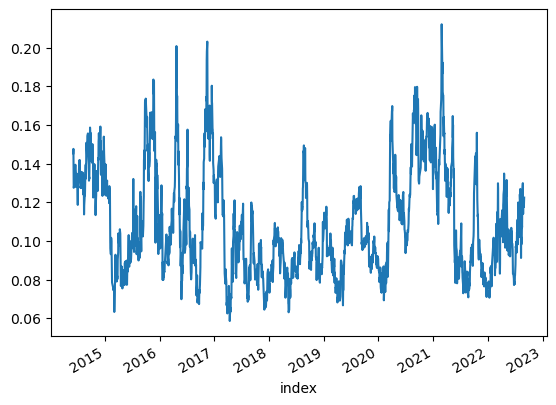

F=0.0009940357852882703, T=1006.0000000000001, Amplitude=0.011909603331285124
F=0.0019880715705765406, T=503.00000000000006, Amplitude=0.014640892747540065


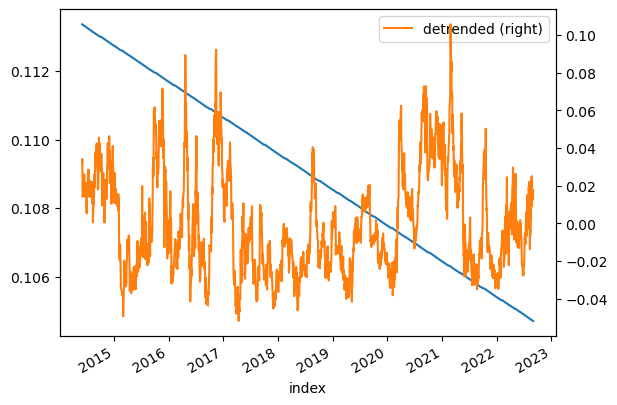

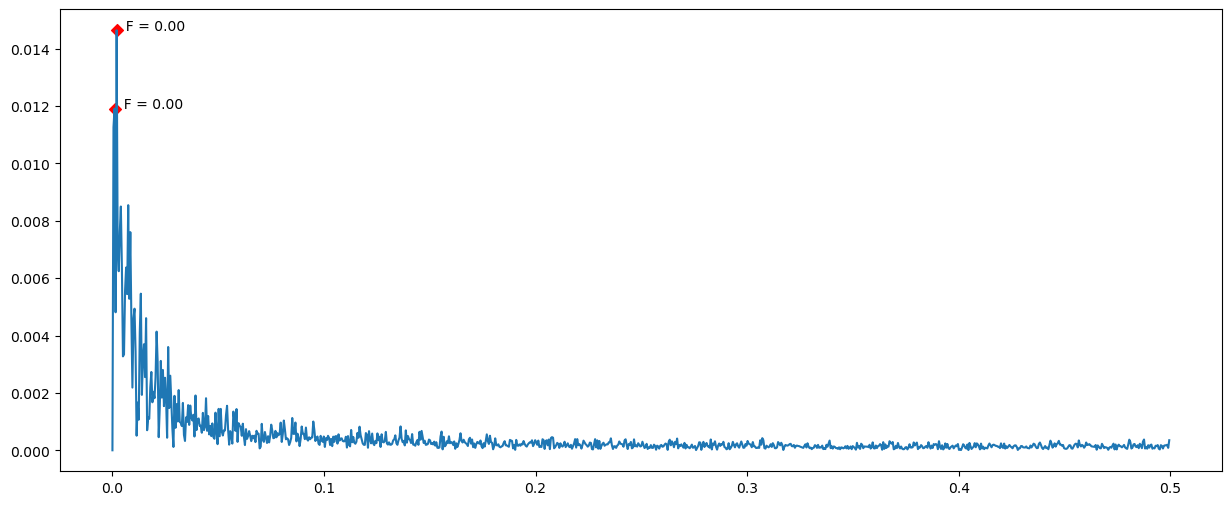

In [2]:
def snr(s: pd.Series):
    return abs((s[-1] - s[0])) / s.diff().abs().sum()

term = 100
inss = [ins for ins in system.get_instrument_list()]
snrs = [data.daily_prices(ins).dropna().rolling(term, min_periods=term).apply(snr).rename(ins) for ins in inss]
df = pd.concat(snrs, axis=1)
mdi = df.mean(axis=1).rename('mdi').dropna()
mdi.plot()

plt.show()
signal_fft(mdi, 1, 0.01)

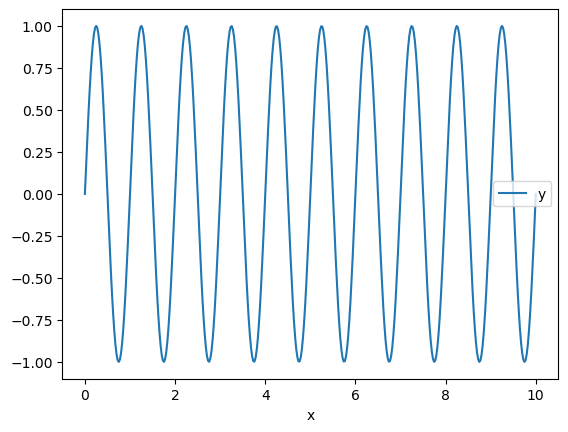

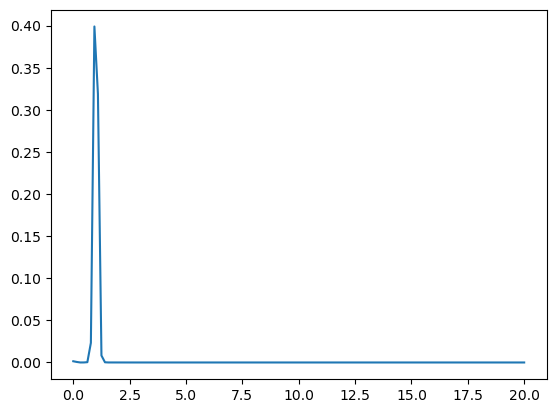

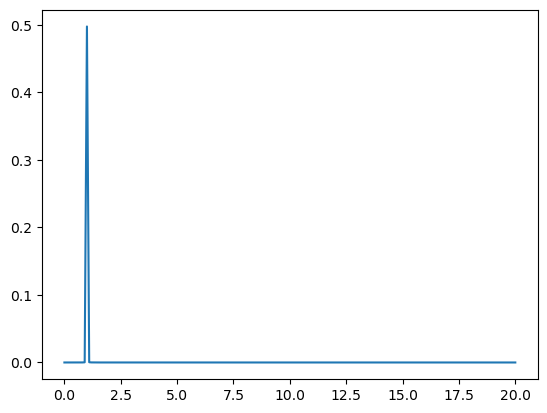

In [4]:
import numpy as np
from scipy.signal import welch, periodogram
import pandas as pd
import matplotlib.pyplot as plt

T = 1
amplitude = 1
frequency = 1 / T
T_sample_N = 40
sampling_frequency = T_sample_N / T
N_periods = 10
x_value = np.linspace(0, T * N_periods, T_sample_N * N_periods)
y_values = amplitude*np.sin(2*np.pi*frequency*x_value)
df = pd.DataFrame({
    'x': x_value,
    'y': y_values
})
df.plot(x='x', y='y')
plt.show()

f, p = welch(y_values, sampling_frequency, scaling='spectrum')
plt.plot(f, p)
plt.show()
f2, p2 = periodogram(y_values, sampling_frequency, scaling='spectrum')
plt.plot(f2, p2)
plt.show()

In [4]:
from  sklearn.linear_model import LinearRegression

df = pd.concat([mdi, rolling_return], axis=1).dropna()
df.plot.scatter(x='mdi', y='rolling_return')

model = LinearRegression()
estimator = model.fit(pd.DataFrame(df['mdi']), pd.DataFrame(df['rolling_return']))
estimator.score(pd.DataFrame(df['mdi']), pd.DataFrame(df['rolling_return']))

NameError: name 'rolling_return' is not defined

<BarContainer object of 10 artists>

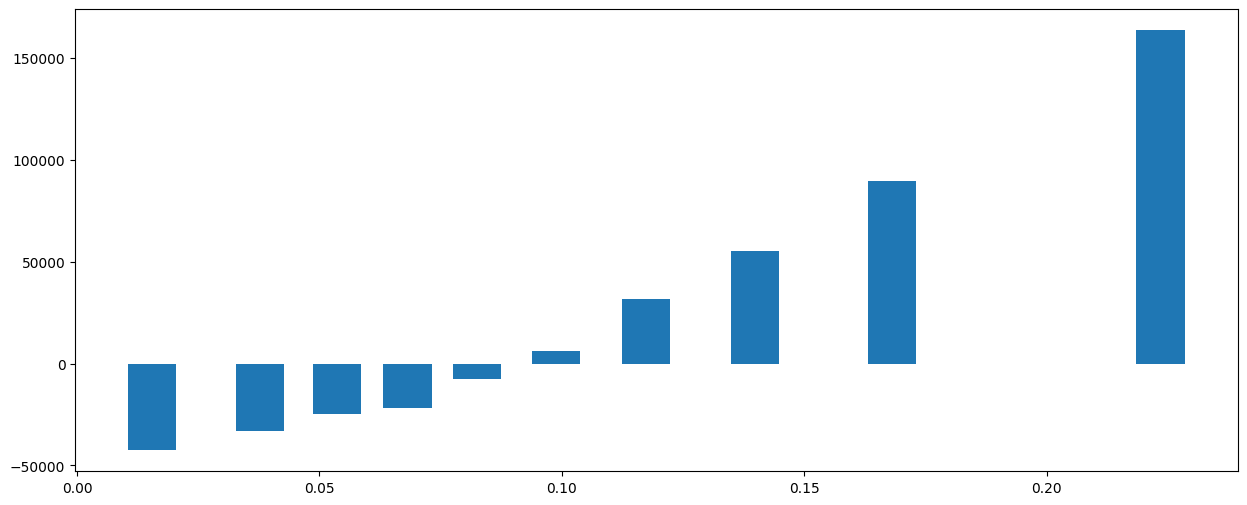

In [ ]:
import numpy as np

xs = []
ys = []
for bin in np.array_split(df.sort_values('mdi'), 10):
    xs.append(bin['mdi'].mean())
    ys.append(bin['rolling_return'].mean())
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(xs, ys, width=0.01)